<a href="https://colab.research.google.com/github/VVdovichev/Data_analysis_algorithms/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [811]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [812]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [813]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [814]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

__1.__Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [815]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [816]:
# Масштабирование
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [817]:
lambda_ = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2]

dict_w = {}

for i in lambda_:
    dict_w[i] = gradient_descent_reg_l2(X_st, y, iterations=10000, reg=i)

Iter: 0, weights: [-0.08191317 -0.87897794 -0.04465632 -2.28580921], error 3441.7646129868313
Iter: 1000, weights: [10.17557424  1.22103497  1.98910118 -0.125789  ], error 2250.5943879650326
Iter: 2000, weights: [18.57352664  2.50007721  3.14942026  1.17754433], error 1494.8830166389052
Iter: 3000, weights: [25.44905099  3.28978072  3.79193243  1.97191918], error 1003.3797921316606
Iter: 4000, weights: [31.07814162  3.7872983   4.12793388  2.46394222], error 679.2018196547783
Iter: 5000, weights: [35.68675904  4.10986325  4.28295023  2.77635998], error 463.73210296328153
Iter: 6000, weights: [39.45990037  4.32721201  4.33153897  2.98208685], error 319.91282740410173
Iter: 7000, weights: [42.54902542  4.48085181  4.31797091  3.12442624], error 223.69274754961947
Iter: 8000, weights: [45.0781365   4.59551079  4.2685203   3.22908703], error 159.22876458587135
Iter: 9000, weights: [47.14875611  4.68594253  4.19876812  3.31132434], error 115.99952762086886
Final MSE: 86.98721880741165
Iter:

In [818]:
dict_w

{1e-08: array([48.84247064,  4.76090064,  4.11802649,  3.38011864]),
 1e-07: array([49.05186347,  4.36126752,  3.3862256 ,  4.54168745]),
 1e-06: array([48.82988227,  4.77832033,  3.26667331,  4.2467666 ]),
 1e-05: array([49.04328396,  4.61401329,  3.97234952,  3.67795478]),
 0.0001: array([48.8821541 ,  4.94872383,  3.65785415,  3.66971604]),
 0.001: array([49.07233848,  4.10745031,  3.80138908,  4.3302368 ]),
 0.01: array([48.50208801,  5.01877266,  2.79704115,  4.49158768]),
 0.1: array([47.16596433,  4.25709596,  3.9899819 ,  3.7797952 ]),
 1: array([35.83350908,  3.69680636,  2.673441  ,  3.96873198]),
 10.0: array([9.41660952, 1.44985064, 1.33833763, 1.42939727]),
 100.0: array([1.10784314, 0.20547419, 0.19795963, 0.20576233])}

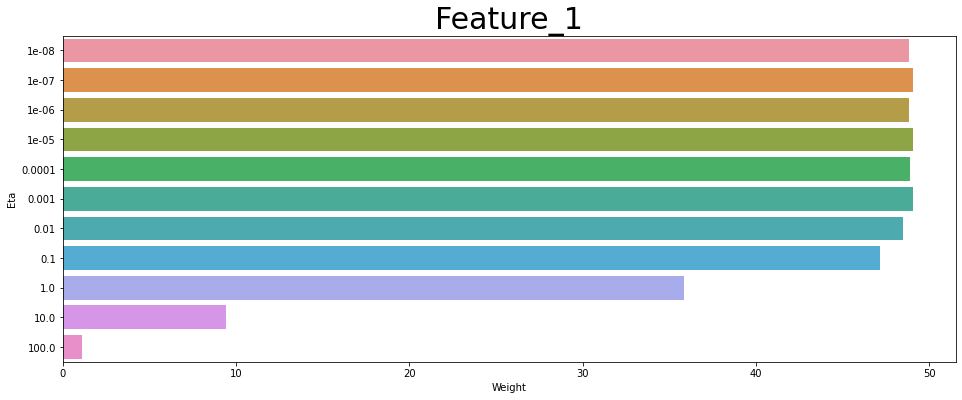

In [819]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][0])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_1', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

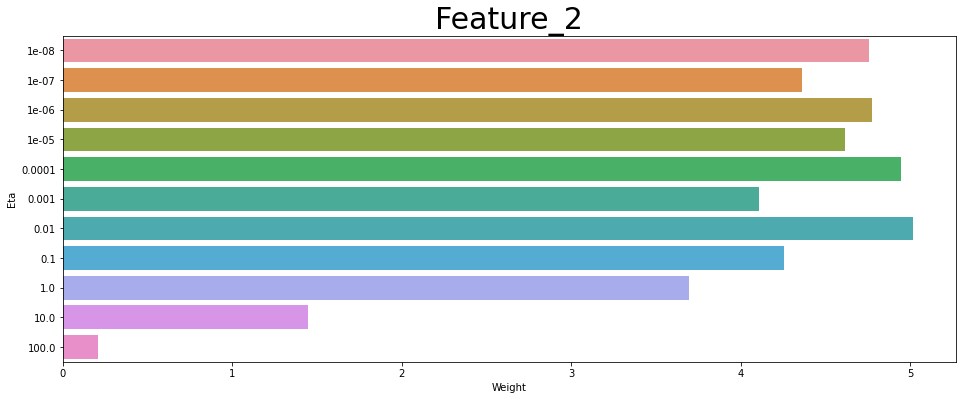

In [820]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][1])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_2', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

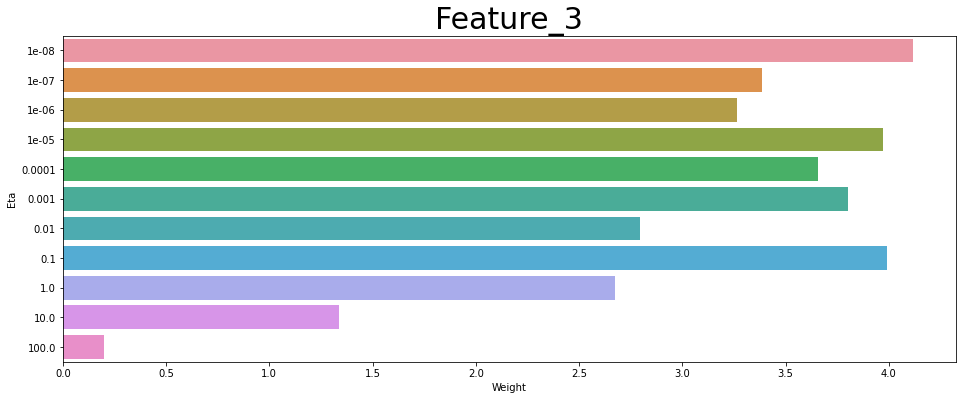

In [821]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][2])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_3', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

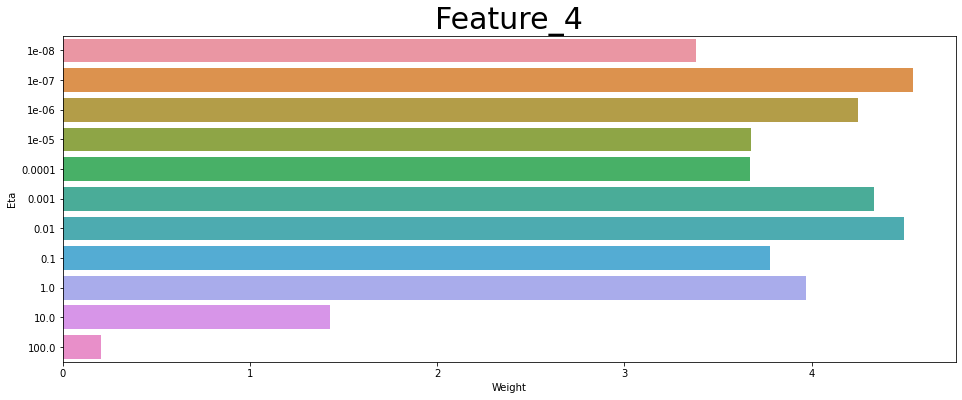

In [822]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][3])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_4', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

Исходя из графиков можем сделать вывод: при увеличении L2-регуляризации, вес признаков уменьшается.

__2.__Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [823]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

__3.__Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но думаю, что данные обработанные сразу двумя этими методами, будут плохо сказываться на качестве модели. 

__4.__* Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [824]:
X, y, w_true = make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X, y, w_true

(array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
          0.77271648, -0.5294093 ],
        [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
          0.65967443, -0.5364636 ],
        [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
          1.29076796, -0.34530826],
        ...,
        [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
         -0.59041036, -0.6747931 ],
        [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
          0.02393901,  1.37086726],
        [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
         -0.26133944,  0.50888458]]),
 array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
         161.66813826,  380.05918834]),
 array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
        9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
        3.71965212e+01, 6.59198012e-02, 0.00

In [825]:
X = standard_scale(X)

In [826]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [827]:

# классический  GD
def gradient_descent(X, y, iterations, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        err = calc_mse(y, y_pred)
        errors.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [828]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(X, y, iterations=5000, eta=1e-3)

Iter: 0, weights: [ 1.61246033  0.55120196  2.23219431 -2.31959819 -0.08396464  0.1500582
  0.55134063 -0.29385632 -0.01398481 -0.84580602 -0.27640437  0.44883617
 -1.31311456 -0.33529435 -1.00608633  0.38204705  0.29219835 -1.72513349
 -2.27426791  0.50687373], error 28306.60819193087
Iter: 500, weights: [ 5.40508705e+00  6.35141197e+00  8.31106920e-01 -6.55902562e-01
 -1.88040943e-02  5.01027608e+01  3.33245159e-01  2.86408528e-01
  6.09795094e+01  3.74155295e+01 -7.72153724e-02  2.14179462e+01
  2.33852355e+01 -3.04159703e-01 -7.23961527e-01  5.27161579e-02
  1.35158038e-01  1.69151643e+01 -1.06553388e+00  4.68970657e+01], error 3778.768206367027
Iter: 1000, weights: [ 6.96943582e+00  8.45671274e+00  3.14371991e-01 -1.70339245e-01
 -2.50221271e-03  6.82349827e+01  1.63419652e-01  2.40465817e-01
  8.32508607e+01  5.14152528e+01 -1.58384396e-02  2.88995847e+01
  3.22339371e+01 -1.53410424e-01 -4.13461266e-01 -2.19371237e-02
  5.09506266e-02  2.37985878e+01 -4.82277445e-01  6.38442353e

In [829]:
errors_sgd = []
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, size, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    w_list = [W.copy()]
        
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)
            
        y_pred = np.dot(X[train_ind], W)
            
        W = W - eta * 2 / y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - y[train_ind])
        
        err= calc_mse(y, np.dot(X, W))
        errors_sgd.append(err)
        w_list.append(W)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [830]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, y, iterations=5000, eta=1e-3, size=1)

Iter: 0, weights: [-0.69338002 -0.07415762 -0.39935805  0.90050524 -1.1057724   0.61949701
 -0.6362815  -0.68036449  0.35665482  0.58033599 -0.70804694  0.46703597
 -0.26490214  0.54171026 -0.24635171 -0.39114323 -0.03210278 -0.11145437
  0.73570815  0.79880901], error 27692.736582959165
Iter: 500, weights: [-4.92897173e-01  7.39788070e+00  1.76876033e+00 -3.21312910e+00
 -1.92728990e-02  4.85354229e+01 -3.48741783e+00 -1.45497740e+00
  6.33675155e+01  3.84066467e+01  3.56430279e-01  2.10613554e+01
  2.77030702e+01 -6.34070023e-01 -2.54797658e+00 -5.57957554e+00
 -1.81526405e+00  2.13358643e+01 -3.60103848e+00  4.77539428e+01], error 3569.0886732861404
Iter: 1000, weights: [ 3.54157087e+00  9.82890800e+00  3.29810775e+00 -1.65525073e+00
 -8.25674971e-01  6.74751211e+01 -1.75605420e+00 -1.30667964e+00
  8.26495380e+01  5.18221415e+01  4.07500089e-01  2.81251142e+01
  3.39585901e+01  4.86703388e-01 -1.27563659e+00 -2.62657611e+00
 -6.46363076e-01  2.61411330e+01 -3.08905684e-02  6.314322

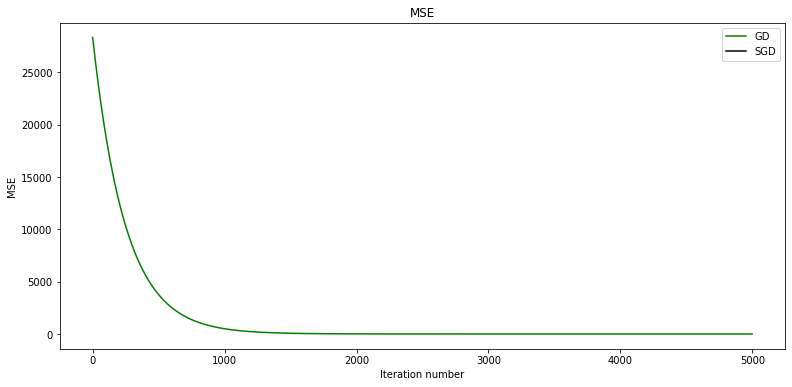

In [839]:
plt.figure(figsize=(13, 6))

plt.plot(range(len(errors_GD)), errors_GD, color='g', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='black', label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

###Вывод: на больших наборах данных алгоритм SGD работает на много быстрее GD.